## 1. Consolidated files in the unique DataFrame and show the total files extracted

Install Dependencies

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:

import pandas as pd

all_files = pd.read_pickle("../etl/views/" + "dataset.pkl")

all_files.shape

# the last 5 rows
all_files.tail()


,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
2792,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.03,26.01,-0.11,-0.4,25.72,26.33,1716342722,2024-05-21 22:52:02,BRL-NPR,2024-05-22 03:10:35,BRL-NPR-1716347434,NaN,NaN,NaN,NaN
2793,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.0207,0.4,5.1645,5.1652,1716584393,2024-05-24 17:59:53,USD-BRL,2024-05-25 03:27:19,USD-BRL-1716607639,NaN,NaN,NaN,NaN
2794,USD,UGX,Dólar Americano/Shilling Ugandês,3808.67,3805.9,1.45,0.04,3765.92,3848.79,1716347415,2024-05-22 00:10:15,USD-UGX,2024-05-22 03:11:44,USD-UGX-1716347504,NaN,NaN,NaN,NaN
2795,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0,0,3.64,3.643,1716347432,2024-05-22 00:10:32,USD-QAR,2024-05-22 03:11:10,USD-QAR-1716347469,NaN,NaN,NaN,NaN
2796,BRL,OMR,Real Brasileiro/Rial Omanense,0.0747,0.0747,-0.0005,-0.62,0.0744,0.0749,1716438181,2024-05-23 01:23:01,BRL-OMR,2024-05-23 04:26:21,BRL-OMR-1716438381,NaN,NaN,NaN,NaN


## 1.1 Data set sample, list 5 files

In [9]:
all_files.head(3)

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,USD,CHF,Dólar Americano/Franco Suíço,0.9159,0.9134,0.0005,0.05,0.9146,0.915,1716584396,2024-05-24 17:59:56,USD-CHF,2024-05-26 01:42:56,USD-CHF-1716687776,NaN,NaN,NaN,NaN
1,USD,CAD,Dólar Americano/Dólar Canadense,1.374,1.3648,-0.0064,-0.47,1.3663,1.3667,1716584394,2024-05-24 17:59:54,USD-CAD,2024-05-26 01:42:57,USD-CAD-1716687777,NaN,NaN,NaN,NaN
2,NZD,USD,Dólar Neozelandês/Dólar Americano,0.6127,0.6087,0.0024,0.39,0.612,0.6122,1716584384,2024-05-24 17:59:44,NZD-USD,2024-05-26 01:42:57,NZD-USD-1716687777,NaN,NaN,NaN,NaN


## 2. Change DataTypes and Reorder columns

In [10]:
# Change data types
df = all_files.astype({'ask': float, 'bid': float, 'varBid': float, 'pctChange': float})

# Show the dataframe
df.head(3)


,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,USD,CHF,Dólar Americano/Franco Suíço,0.9159,0.9134,0.0005,0.05,0.9146,0.9150,1716584396,2024-05-24 17:59:56,USD-CHF,2024-05-26 01:42:56,USD-CHF-1716687776,NaN,NaN,NaN,NaN
1,USD,CAD,Dólar Americano/Dólar Canadense,1.374,1.3648,-0.0064,-0.47,1.3663,1.3667,1716584394,2024-05-24 17:59:54,USD-CAD,2024-05-26 01:42:57,USD-CAD-1716687777,NaN,NaN,NaN,NaN
2,NZD,USD,Dólar Neozelandês/Dólar Americano,0.6127,0.6087,0.0024,0.39,0.6120,0.6122,1716584384,2024-05-24 17:59:44,NZD-USD,2024-05-26 01:42:57,NZD-USD-1716687777,NaN,NaN,NaN,NaN


## 3. Using SQL for Data Exploration
    3.1 What is the currency with the highest ask value?

In [11]:
from pandasql import sqldf

query = """
    SELECT * FROM df 
"""

newDf = sqldf(query, locals())

newDf



,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,USD,CHF,Dólar Americano/Franco Suíço,0.9159,0.9134,0.0005,0.05,0.9146,0.9150,1716584396,2024-05-24 17:59:56,USD-CHF,2024-05-26 01:42:56,USD-CHF-1716687776,NaN,None,None,None
1,USD,CAD,Dólar Americano/Dólar Canadense,1.374,1.3648,-0.0064,-0.47,1.3663,1.3667,1716584394,2024-05-24 17:59:54,USD-CAD,2024-05-26 01:42:57,USD-CAD-1716687777,NaN,None,None,None
2,NZD,USD,Dólar Neozelandês/Dólar Americano,0.6127,0.6087,0.0024,0.39,0.6120,0.6122,1716584384,2024-05-24 17:59:44,NZD-USD,2024-05-26 01:42:57,NZD-USD-1716687777,NaN,None,None,None
3,USD,ZAR,Dólar Americano/Rand Sul-Africano,18.5039,18.3647,-0.0433,-0.23,18.4132,18.4411,1716584383,2024-05-24 17:59:43,USD-ZAR,2024-05-26 01:42:57,USD-ZAR-1716687777,NaN,None,None,None
4,USD,TRY,Dólar Americano/Nova Lira Turca,32.2834,32.0485,0.0729,0.23,32.2004,32.2624,1716584394,2024-05-24 17:59:54,USD-TRY,2024-05-26 01:42:57,USD-TRY-1716687777,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.03,26.01,-0.1100,-0.40,25.7200,26.3300,1716342722,2024-05-21 22:52:02,BRL-NPR,2024-05-22 03:10:35,BRL-NPR-1716347434,NaN,None,None,None
2793,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.0207,0.40,5.1645,5.1652,1716584393,2024-05-24 17:59:53,USD-BRL,2024-05-25 03:27:19,USD-BRL-1716607639,NaN,None,None,None
2794,USD,UGX,Dólar Americano/Shilling Ugandês,3808.67,3805.9,1.4500,0.04,3765.9200,3848.7900,1716347415,2024-05-22 00:10:15,USD-UGX,2024-05-22 03:11:44,USD-UGX-1716347504,NaN,None,None,None
2795,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0.0000,0.00,3.6400,3.6430,1716347432,2024-05-22 00:10:32,USD-QAR,2024-05-22 03:11:10,USD-QAR-1716347469,NaN,None,None,None


    3.1 Disponible Data

In [12]:
from pandasql import sqldf

query = """
    SELECT * FROM df 
"""

newDf = sqldf(query, locals())
 
newDf

,code,codein,name,high,low,varBid,pctChange,bid,ask,timestamp,create_date,symbol,extracted_at,id,value,key1,key2,key3
0,USD,CHF,Dólar Americano/Franco Suíço,0.9159,0.9134,0.0005,0.05,0.9146,0.9150,1716584396,2024-05-24 17:59:56,USD-CHF,2024-05-26 01:42:56,USD-CHF-1716687776,NaN,None,None,None
1,USD,CAD,Dólar Americano/Dólar Canadense,1.374,1.3648,-0.0064,-0.47,1.3663,1.3667,1716584394,2024-05-24 17:59:54,USD-CAD,2024-05-26 01:42:57,USD-CAD-1716687777,NaN,None,None,None
2,NZD,USD,Dólar Neozelandês/Dólar Americano,0.6127,0.6087,0.0024,0.39,0.6120,0.6122,1716584384,2024-05-24 17:59:44,NZD-USD,2024-05-26 01:42:57,NZD-USD-1716687777,NaN,None,None,None
3,USD,ZAR,Dólar Americano/Rand Sul-Africano,18.5039,18.3647,-0.0433,-0.23,18.4132,18.4411,1716584383,2024-05-24 17:59:43,USD-ZAR,2024-05-26 01:42:57,USD-ZAR-1716687777,NaN,None,None,None
4,USD,TRY,Dólar Americano/Nova Lira Turca,32.2834,32.0485,0.0729,0.23,32.2004,32.2624,1716584394,2024-05-24 17:59:54,USD-TRY,2024-05-26 01:42:57,USD-TRY-1716687777,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,BRL,NPR,Real Brasileiro/Rúpia Nepalesa,26.03,26.01,-0.1100,-0.40,25.7200,26.3300,1716342722,2024-05-21 22:52:02,BRL-NPR,2024-05-22 03:10:35,BRL-NPR-1716347434,NaN,None,None,None
2793,USD,BRL,Dólar Americano/Real Brasileiro,5.1764,5.1304,0.0207,0.40,5.1645,5.1652,1716584393,2024-05-24 17:59:53,USD-BRL,2024-05-25 03:27:19,USD-BRL-1716607639,NaN,None,None,None
2794,USD,UGX,Dólar Americano/Shilling Ugandês,3808.67,3805.9,1.4500,0.04,3765.9200,3848.7900,1716347415,2024-05-22 00:10:15,USD-UGX,2024-05-22 03:11:44,USD-UGX-1716347504,NaN,None,None,None
2795,USD,QAR,Dólar Americano/Rial Catarense,3.6415,3.6415,0.0000,0.00,3.6400,3.6430,1716347432,2024-05-22 00:10:32,USD-QAR,2024-05-22 03:11:10,USD-QAR-1716347469,NaN,None,None,None


## 4. Using SQL + Matplotlib for Data Viz
    4.1 What is the TOP 10 Most Value Currency considering BRL?

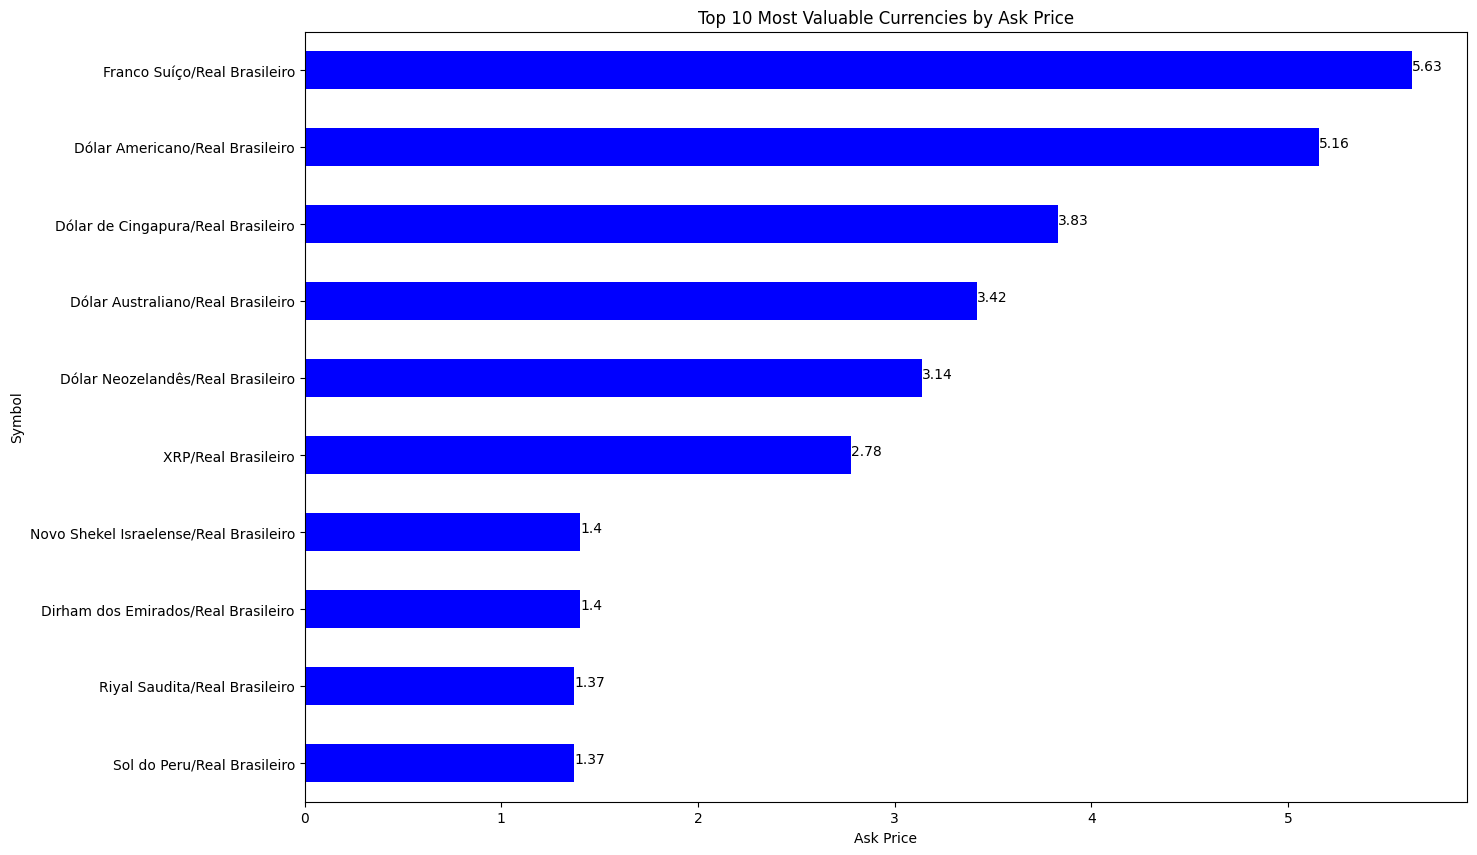

In [13]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by name
    order by avg(ask) desc limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=True, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.2 What is the TOP 10 locations BRL has + value?

posx and posy should be finite values
posx and posy should be finite values


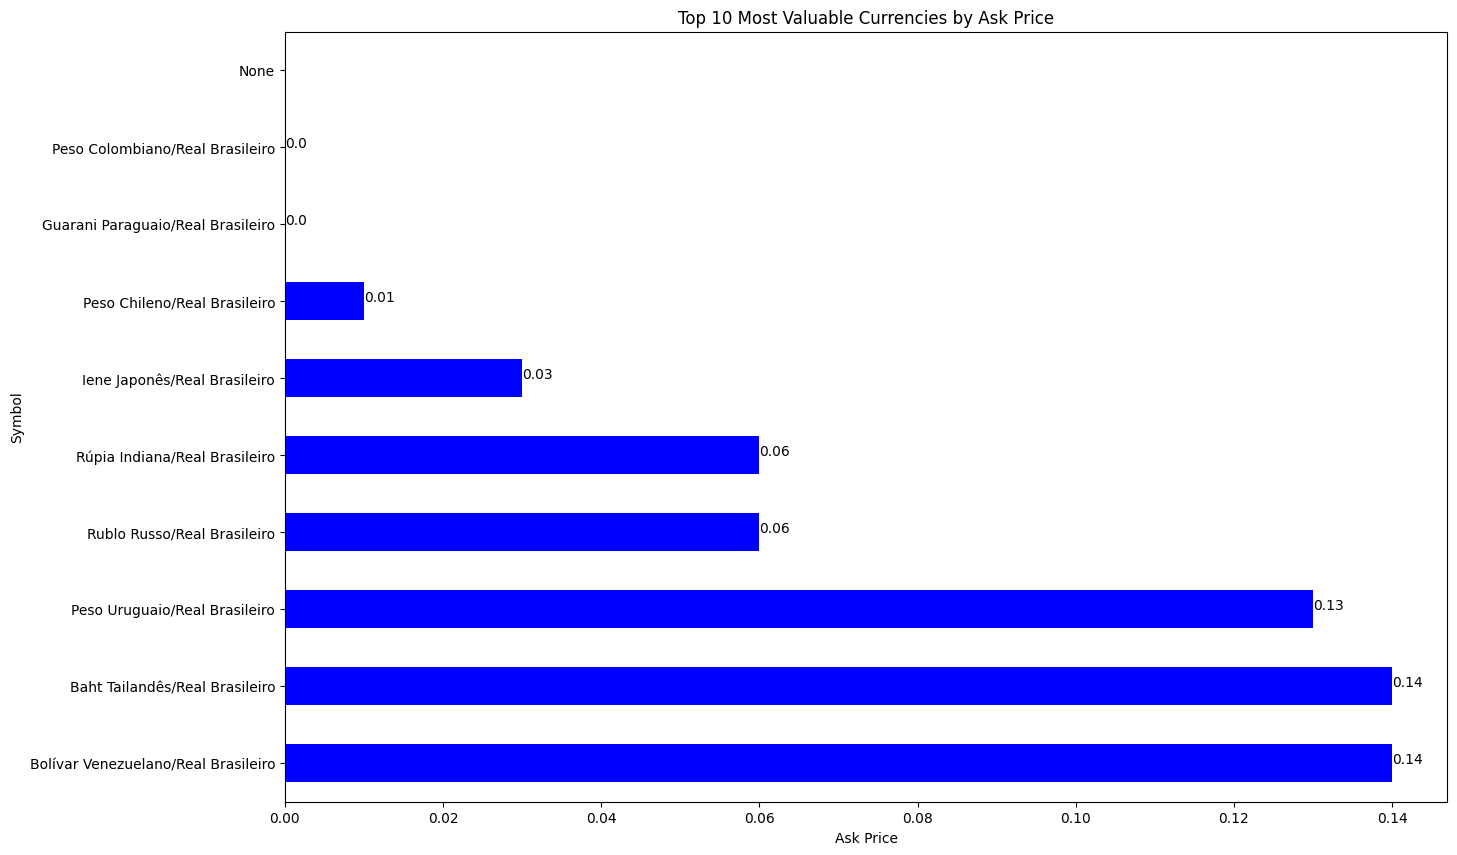

In [14]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC')
    group by name
    order by avg(ask) limit 10
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.3 What the top 10 like BRL in value?

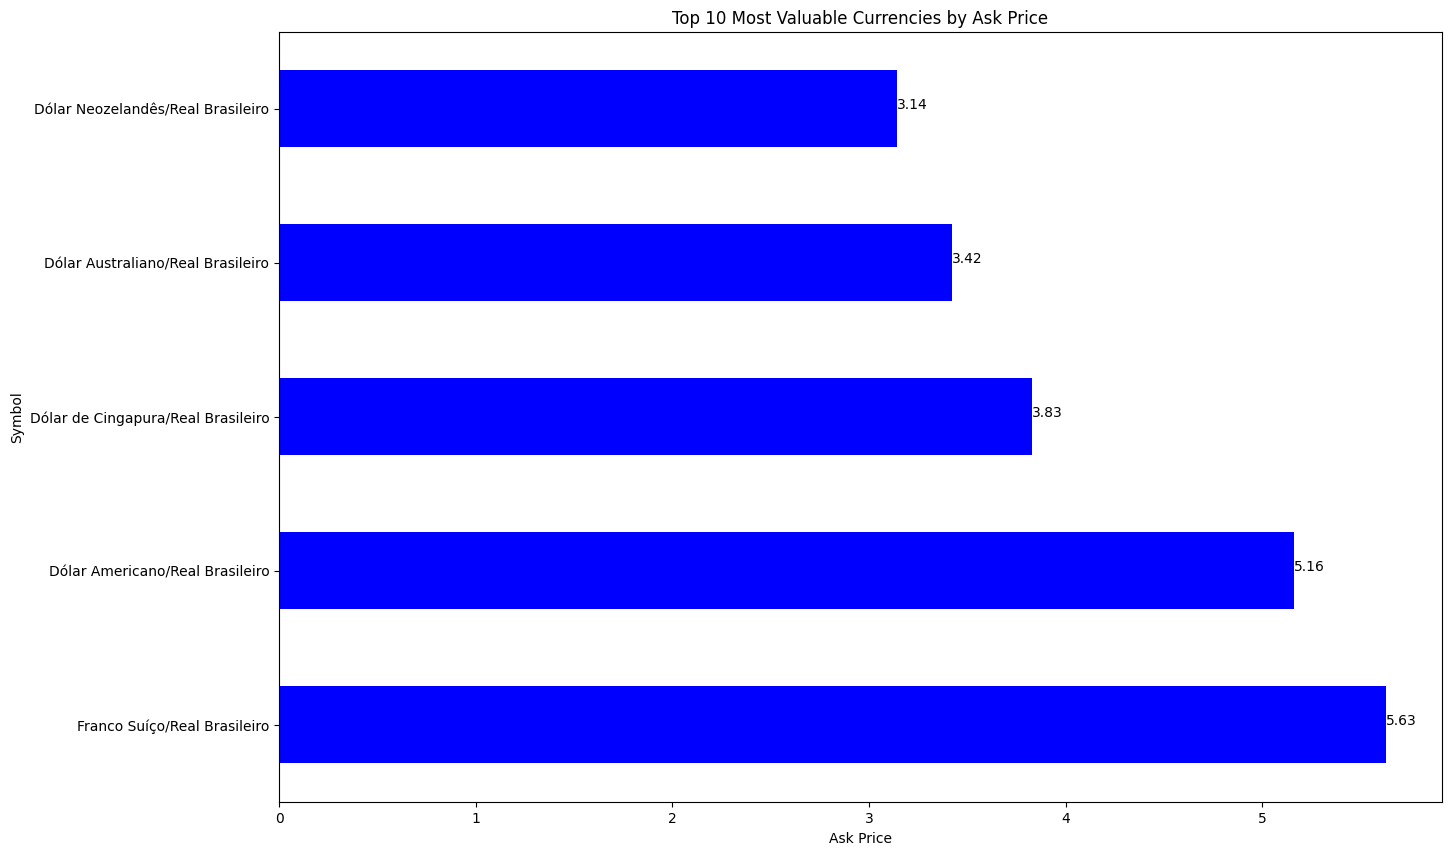

In [15]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        name
        ,round(avg(ask),2) AvgAsk
    FROM df 
    where codein = 'BRL'
    and not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    and ask >=1
    group by name
    order by avg(ask) desc limit 5
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='AvgAsk', ascending=False, inplace=True)

AvgAskByCurrency = newDf.plot(
    kind='barh', x='name', y='AvgAsk', 
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Top 10 Most Valuable Currencies by Ask Price', xlabel='Ask Price', ylabel='Symbol')


# Adicionando rótulos aos dados
for index, value in enumerate(newDf['AvgAsk']):
    plt.text(value, index, str(value))

# Exibir o gráfico
plt.show()

4.4 Average Ask By Day

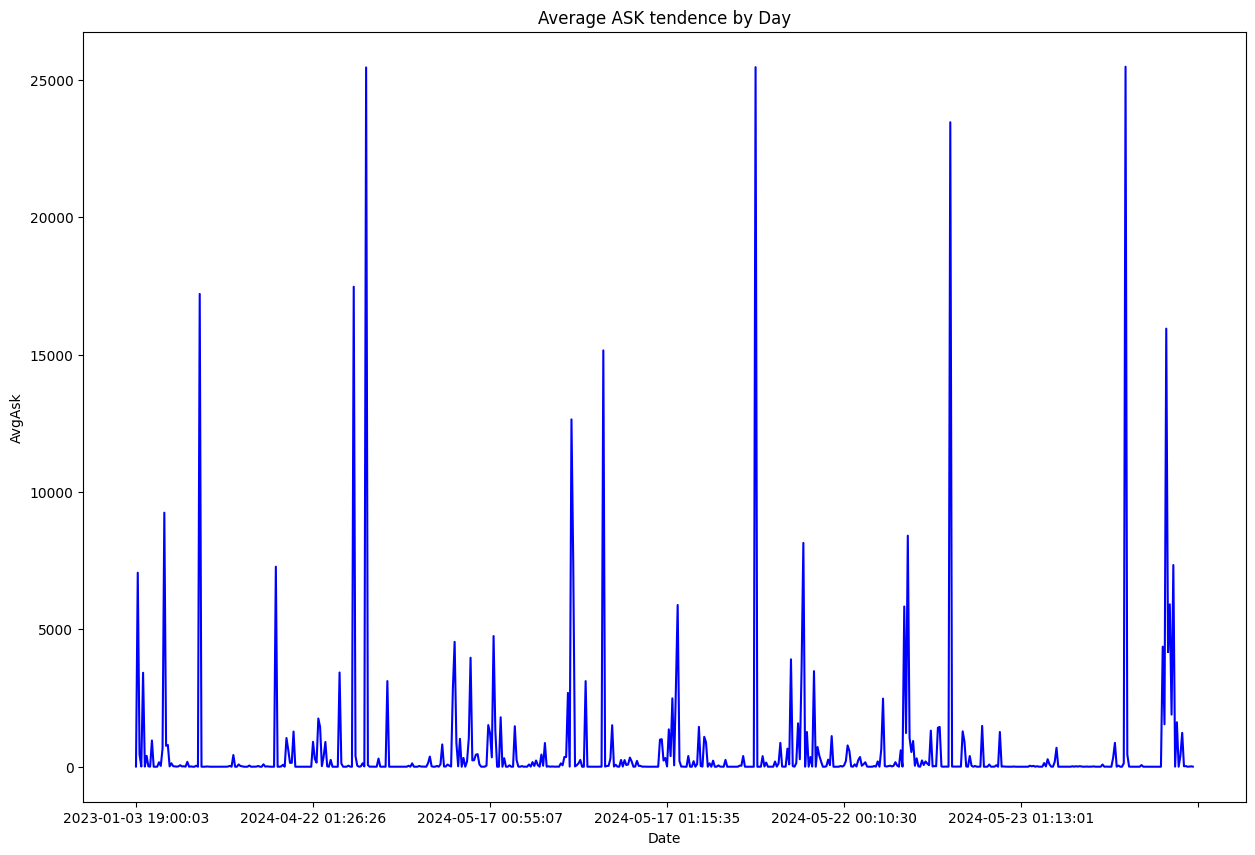

In [16]:

import matplotlib.pyplot as plt

## Query to get the average ASK and BID by day
query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='DT_REF', ascending=True, inplace=True)

cht = newDf.plot(
    kind='line', x='DT_REF', y='AvgAsk',
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Average ASK tendence by Day', xlabel='Date', ylabel='AvgAsk')

#exibir o grafico
plt.show()

4.5 Average Bid By Day

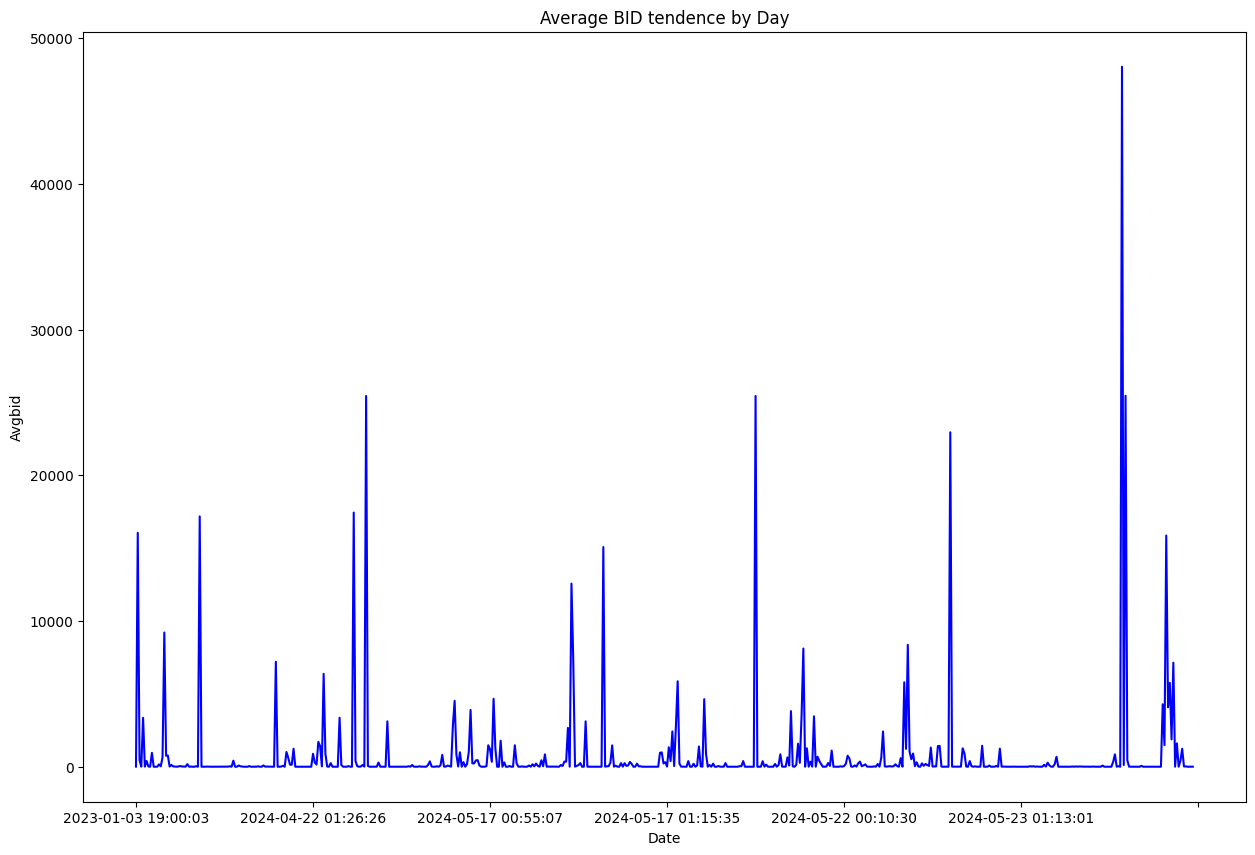

In [17]:

import matplotlib.pyplot as plt

query = """
    SELECT 
        create_date DT_REF
        ,round(avg(ask),2) AvgAsk
        ,round(avg(bid),2) Avgbid
    FROM df 
    where not code in ('BTC', 'ETH', 'LTC', 'DOGE')
    group by 1
    order by 1 
"""

newDf = sqldf(query, locals())
newDf.sort_values(by='DT_REF', ascending=True, inplace=True)

cht = newDf.plot(
    kind='line', x='DT_REF', y='Avgbid',
    figsize=(15, 10), 
    legend=False, 
    color='blue', title='Average BID tendence by Day', xlabel='Date', ylabel='Avgbid')

#exibir o grafico
plt.show()